# 1) 다양한 단어의 표현 방법

## 1. 단어의 표현 방법

- 표현 방법
  - 국소 표현(Local Representation) 방법
    - 해당 단어 그 자체만 보고, 특정값을 맵핑하여 단어를 표현
    - 이산 표현
  - 분산 표현(Distributed Representation) 방법
    - 단어를 표현하고자 주변을 참고하여 단어를 표현
    - 연속 표현(Continuous Represnetation)

## 2. 단어 표현의 카테고리화

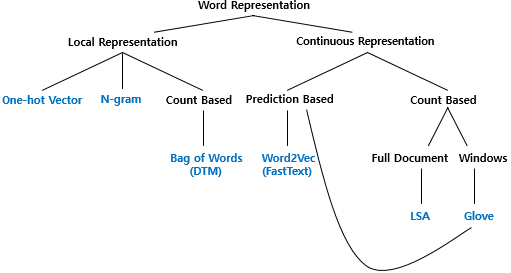

# 2) Bag of Words(BoW)

## 1. Bag of Words란?

-  정의: 순서는 고려하지 않고, 단어들의 출현 빈도(frequency)에만 집중
- 과정
  1. 단어에 고유한 정수 인덱스를 부여
    - 단어 집합 생성
  2. 인덱스의 위치에 단어 토큰의 등장 횟수를 기록한 벡터 생성

In [2]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 448 kB 50.3 MB/s 


In [3]:
from konlpy.tag import Okt

okt = Okt()

def build_bag_of_words(document):
  # 온점 제거 및 형태소 분석
  document = document.replace('.', '')
  tokenized_document = okt.morphs(document)

  word_to_index = {}
  bow = []

  for word in tokenized_document:  
    if word not in word_to_index.keys():
      word_to_index[word] = len(word_to_index)  
      # BoW에 전부 기본값 1을 넣는다.
      bow.insert(len(word_to_index) - 1, 1)
    else:
      # 재등장하는 단어의 인덱스
      index = word_to_index.get(word)
      # 재등장한 단어는 해당하는 인덱스의 위치에 1을 더한다.
      bow[index] = bow[index] + 1

  return word_to_index, bow

In [4]:
doc1 = "정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다."
vocab, bow = build_bag_of_words(doc1)
print('vocabulary :', vocab)
print('bag of words vector :', bow)

vocabulary : {'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9}
bag of words vector : [1, 2, 1, 1, 2, 1, 1, 1, 1, 1]


## 2. Bag of Words의 다른 예제들

In [5]:
doc2 = '소비자는 주로 소비하는 상품을 기준으로 물가상승률을 느낀다.'

vocab, bow = build_bag_of_words(doc2)
print('vocabulary :', vocab)
print('bag of words vector :', bow)

vocabulary : {'소비자': 0, '는': 1, '주로': 2, '소비': 3, '하는': 4, '상품': 5, '을': 6, '기준': 7, '으로': 8, '물가상승률': 9, '느낀다': 10}
bag of words vector : [1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1]


In [6]:
doc3 = doc1 + ' ' + doc2
vocab, bow = build_bag_of_words(doc3)
print('vocabulary :', vocab)
print('bag of words vector :', bow)

vocabulary : {'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9, '는': 10, '주로': 11, '소비': 12, '상품': 13, '을': 14, '기준': 15, '으로': 16, '느낀다': 17}
bag of words vector : [1, 2, 1, 2, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1]


## 3. CountVectorizer 클래스로 BoW 만들기


In [7]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = ['you know I want your love. because I love you.']
vector = CountVectorizer()

# 코퍼스로부터 각 단어의 빈도수를 기록
print('bag of words vector :', vector.fit_transform(corpus).toarray()) 

# 각 단어의 인덱스가 어떻게 부여되었는지를 출력
print('vocabulary :',vector.vocabulary_)

#CountVectorizer는 단지 띄어쓰기만을 기준으로 단어를 자르는 낮은 수준의 토큰화를 진행하고 BoW를 만든다는 점을 주의

bag of words vector : [[1 1 2 1 2 1]]
vocabulary : {'you': 4, 'know': 1, 'want': 3, 'your': 5, 'love': 2, 'because': 0}


## 4. 불용어를 제거한 BoW 만들기

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

In [9]:
#(1) 사용자가 직접 정의한 불용어 사용
text = ["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words=["the", "a", "an", "is", "not"])
print('bag of words vector :',vect.fit_transform(text).toarray())
print('vocabulary :',vect.vocabulary_)

bag of words vector : [[1 1 1 1 1]]
vocabulary : {'family': 1, 'important': 2, 'thing': 4, 'it': 3, 'everything': 0}


In [10]:
#(2) CountVectorizer에서 제공하는 자체 불용어 사용
text = ["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words="english")
print('bag of words vector :',vect.fit_transform(text).toarray())
print('vocabulary :',vect.vocabulary_)

bag of words vector : [[1 1 1]]
vocabulary : {'family': 0, 'important': 1, 'thing': 2}


In [12]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [13]:
#(3) NLTK에서 지원하는 불용어 사용
text = ["Family is not an important thing. It's everything."]
stop_words = stopwords.words("english")
vect = CountVectorizer(stop_words=stop_words)
print('bag of words vector :',vect.fit_transform(text).toarray()) 
print('vocabulary :',vect.vocabulary_)

bag of words vector : [[1 1 1 1]]
vocabulary : {'family': 1, 'important': 2, 'thing': 3, 'everything': 0}


# 3)문서 단어 행렬(Document-Term Matrix, DTM)

## 1. 문서 단어 행렬(Document-Term Matrix, DTM)의 표기법

- 서로 다른 문서들의 BoW들을 결합한 표현
- BoW 표현을 다수의 문서에 대해서 행렬로 표현하고 부르는 용어

## 2. 문서 단어 행렬(Document-Term Matrix)의 한계

1. 희소 표현
  - 문서 벡터의 차원은 수만 이상의 차원
  - 많은 문서 벡터가 대부분의 값이 0을 가질 수
2. 단순 빈도 수 기반 접근

# 4)TF-IDF(Term Frequency-Inverse Document Frequency)

## 1. TF-IDF(단어 빈도-역 문서 빈도, Term Frequency-Inverse Document Frequency)

- 단어의 빈도와 역 문서 빈도(문서의 빈도에 특정 식을 취함)를 사용하여 DTM 내의 각 단어들마다 중요한 정도를 가중치로 주는 방법

- 사용방향
  - 문서의 유사도를 구하는 작업
  - 검색 시스템에서 검색 결과의 중요도를 정하는 작업
  - 문서 내에서 특정 단어의 중요도를 구하는 작업 
- tf(d,t) : 특정 문서 d에서의 특정 단어 t의 등장 횟수.
- df(t) : 특정 단어 t가 등장한 문서의 수.
- idf(d, t) : df(t)에 반비례하는 수
  - =log(n/(1+df(t)))
    - log를 씌워주지 않으면, 값이 너무 커짐


## 2. 파이썬으로 TF-IDF 직접 구현하기

In [14]:
import pandas as pd # 데이터프레임 사용을 위해
from math import log # IDF 계산을 위해

docs = [
  '먹고 싶은 사과',
  '먹고 싶은 바나나',
  '길고 노란 바나나 바나나',
  '저는 과일이 좋아요'
] 
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()

In [15]:
# 총 문서의 수
N = len(docs) 

def tf(t, d):
  return d.count(t)

def idf(t):
  df = 0
  for doc in docs:
    df += t in doc
  return log(N/(df+1))

def tfidf(t, d):
  return tf(t,d)* idf(t)

In [16]:
result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(N):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]
    result[-1].append(tf(t, d))

tf_ = pd.DataFrame(result, columns = vocab)

In [17]:
result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))

idf_ = pd.DataFrame(result, index=vocab, columns=["IDF"])
idf_

,IDF
과일이,0.693147
길고,0.693147
노란,0.693147
먹고,0.287682
바나나,0.287682
사과,0.693147
싶은,0.287682
저는,0.693147
좋아요,0.693147


In [18]:
result = []
for i in range(N):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]
    result[-1].append(tfidf(t,d))

tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0.000000,0.000000,0.000000,0.287682,0.000000,0.693147,0.287682,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.287682,0.287682,0.000000,0.287682,0.000000,0.000000
2,0.000000,0.693147,0.693147,0.000000,0.575364,0.000000,0.000000,0.000000,0.000000
3,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147


## 3. 사이킷런을 이용한 DTM과 TF-IDF 실습

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]

vector = CountVectorizer()

# 코퍼스로부터 각 단어의 빈도수를 기록
print(vector.fit_transform(corpus).toarray())

# 각 단어와 맵핑된 인덱스 출력
print(vector.vocabulary_)

[[0 1 0 1 0 1 0 1 1]
 [0 0 1 0 0 0 0 1 0]
 [1 0 0 0 1 0 1 0 0]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]

tfidfv = TfidfVectorizer().fit(corpus)
print(tfidfv.transform(corpus).toarray())
print(tfidfv.vocabulary_)

[[0.         0.46735098 0.         0.46735098 0.         0.46735098
  0.         0.35543247 0.46735098]
 [0.         0.         0.79596054 0.         0.         0.
  0.         0.60534851 0.        ]
 [0.57735027 0.         0.         0.         0.57735027 0.
  0.57735027 0.         0.        ]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}
